# Kurvendiskussion

## Inhalt

* [Grenzwert](#Grenzwert)
* [Nullstellen](#Nullstellen)
* [Ableitung](#Ableitung)
* [Lokale Minima und Maxima](#Lokale-Minima-und-Maxima)
* [Plot/Grafik](#Plot/Grafik)

Betrachte die durch die reelle Zahl $a$ parametrisierte Funktionenschar:

$$f: x \quad \mapsto \quad \frac{2x^2-20x+42}{x-1}+a, \quad a \in \mathbb{R} $$

Eingabe der Funktion  

In [1]:
var('a')
f(x) = (2*x^2-20*x +42)/(x-1)+a; show(f)

x |--> a + 2*(x^2 - 10*x + 21)/(x - 1)

### Grenzwert
Bestimme den Grenzwert bei x=1 , von positiver und negativer Seite kommend  

In [1]:
f.limit(x=1, dir='plus')

x |--> +Infinity

In [1]:
f.limit(x=1, dir='minus')

x |--> -Infinity

### Nullstellen 

In [1]:
nulls = solve(f==0,x, solution_dict=True)
show(f.roots(x))
show(nulls)

[(-1/4*a - 1/4*sqrt(a^2 - 32*a + 64) + 5, 1),
 (-1/4*a + 1/4*sqrt(a^2 - 32*a + 64) + 5, 1)]

[{x: -1/4*a - 1/4*sqrt(a^2 - 32*a + 64) + 5},
 {x: -1/4*a + 1/4*sqrt(a^2 - 32*a + 64) + 5}]

### Ableitung  

In [1]:
g = f.differentiate(x); show(g)

x |--> 4*(x - 5)/(x - 1) - 2*(x^2 - 10*x + 21)/(x - 1)^2

Extremwerte  

In [1]:
maxi = solve(g==0,x, solution_dict=True); show(maxi)

[{x: -2*sqrt(3) + 1}, {x: 2*sqrt(3) + 1}]

### Lokale Minima und Maxima  

In [1]:
maxi[0]

{x: -2*sqrt(3) + 1}

In [1]:
maxi[0][x]

-2*sqrt(3) + 1

In [1]:
show(((f.diff(x)).diff(x))(maxi[0][x]))

-1/18*sqrt(3)*((2*sqrt(3) - 1)^2 + 20*sqrt(3) + 11) + 2/3*sqrt(3) + 8/3

schwierig zu "lesen" wenn wir manuell ablesen möchten ob es ein Maxima oder Minima ist: in Gleitkommazahl umwandeln  

In [1]:
((f.diff(x)).diff(x))(maxi[0][x]).n() # Maxima

-1.15470053837925

In [1]:
((f.diff(x)).diff(x))(maxi[1][x]).n() # Minima

1.15470053837925

oder Ungleichung ansehen

In [1]:
bool(((f.diff(x)).diff(x))(maxi[0][x]) > 0)# Maxima

False

In [1]:
bool(((f.diff(x)).diff(x))(maxi[1][x]) > 0)# Minima

True

Verhalten von $f$ f&uuml;r gro&szlig;e $x$ (wir k&ouml;nnen unendlich als **`oo`** schreiben)  

In [1]:
f.limit(x=oo), f.limit(x=-oo)

(x |--> +Infinity, x |--> -Infinity)

### Plot/Grafik

Plots einer ausgewählten Schar von a's.

für a=20 gibt es eine imaginäre Nullstelle, die wir ausfiltern

In [1]:
[null[x](a=20) for null in nulls]

[-sqrt(-11), sqrt(-11)]

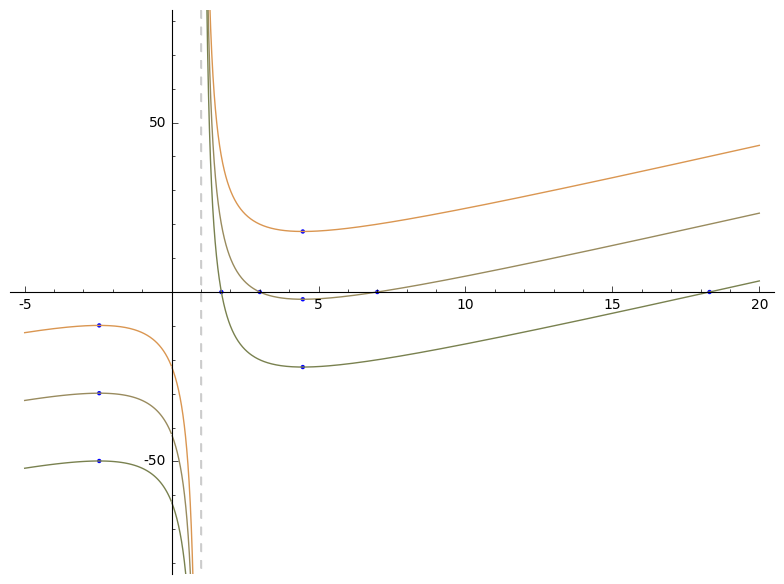

In [1]:
p = Graphics()
for var_a in [0,-20,20]:
    p += plot(f(a=var_a), detect_poles='show', xmin=-5, xmax=20,color=(random(),random(),random()))
    p += add([point((max[x],f(x=max[x],a=var_a))) for max in maxi]) #maxima
    p += add([point((null[x](a=var_a),0)) for null in nulls if null[x](a=var_a).imag() == 0]) #nullstellen

p.show(ymin=-80, ymax=80)